<a href="https://www.kaggle.com/code/adilshamim8/eda-on-health-and-sleep-data?scriptVersionId=224247344" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("/kaggle/input/health-and-sleep-statistics/Health_Sleep_Statistics.csv")
df.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


In [3]:
df.shape

(100, 12)

In [4]:
df.size

1200

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  100 non-null    int64 
 1   Age                      100 non-null    int64 
 2   Gender                   100 non-null    object
 3   Sleep Quality            100 non-null    int64 
 4   Bedtime                  100 non-null    object
 5   Wake-up Time             100 non-null    object
 6   Daily Steps              100 non-null    int64 
 7   Calories Burned          100 non-null    int64 
 8   Physical Activity Level  100 non-null    object
 9   Dietary Habits           100 non-null    object
 10  Sleep Disorders          100 non-null    object
 11  Medication Usage         100 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.5+ KB


In [6]:
df.isna().sum()

User ID                    0
Age                        0
Gender                     0
Sleep Quality              0
Bedtime                    0
Wake-up Time               0
Daily Steps                0
Calories Burned            0
Physical Activity Level    0
Dietary Habits             0
Sleep Disorders            0
Medication Usage           0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['User ID', 'Age', 'Gender', 'Sleep Quality', 'Bedtime', 'Wake-up Time',
       'Daily Steps', 'Calories Burned', 'Physical Activity Level',
       'Dietary Habits', 'Sleep Disorders', 'Medication Usage'],
      dtype='object')

In [9]:
df.describe()

,User ID,Age,Sleep Quality,Daily Steps,Calories Burned
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,36.010000,7.000000,6830.000000,2421.00000
std,29.011492,8.454865,1.734964,2498.706736,281.06759
min,1.000000,22.000000,4.000000,3000.000000,2000.00000
25%,25.750000,28.750000,5.750000,4750.000000,2175.00000
50%,50.500000,35.000000,7.500000,6750.000000,2400.00000
75%,75.250000,44.000000,8.250000,9000.000000,2700.00000
max,100.000000,50.000000,9.000000,11000.000000,2900.00000


# Age vs Sleep Quality

### **Finding Correlation**

In [10]:
age_vs_sleep_quality_corr = df[['Age', 'Sleep Quality']].corr()
age_vs_sleep_quality_corr

,Age,Sleep Quality
Age,1.000000,-0.848356
Sleep Quality,-0.848356,1.000000


In [11]:
relation_coeff = age_vs_sleep_quality_corr.iloc[0, 1]
relation_coeff

-0.8483562912262651

### **Visualising Relationship**

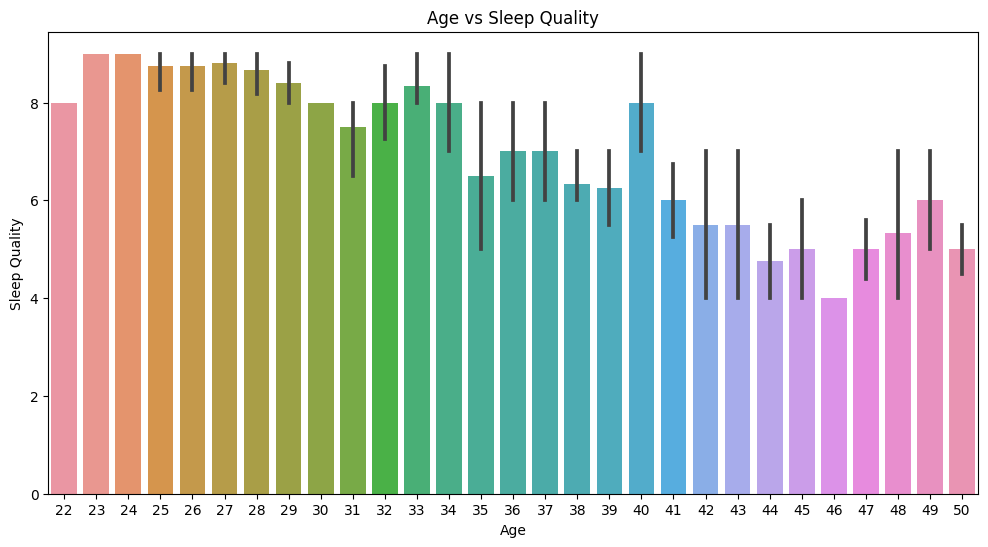

In [12]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Age', y = 'Sleep Quality', data = df)
plt.title("Age vs Sleep Quality")
plt.xlabel("Age")
plt.ylabel("Sleep Quality")
plt.show()

### **Let's see how Linear Regression performs on Age vs Sleep Quality**

In [13]:
X = df[['Age']]
Y = df['Sleep Quality']

model = LinearRegression()

model.fit(X, Y)

LinearRegression()

### **Visualising Predicted values for X using Linear Regression**

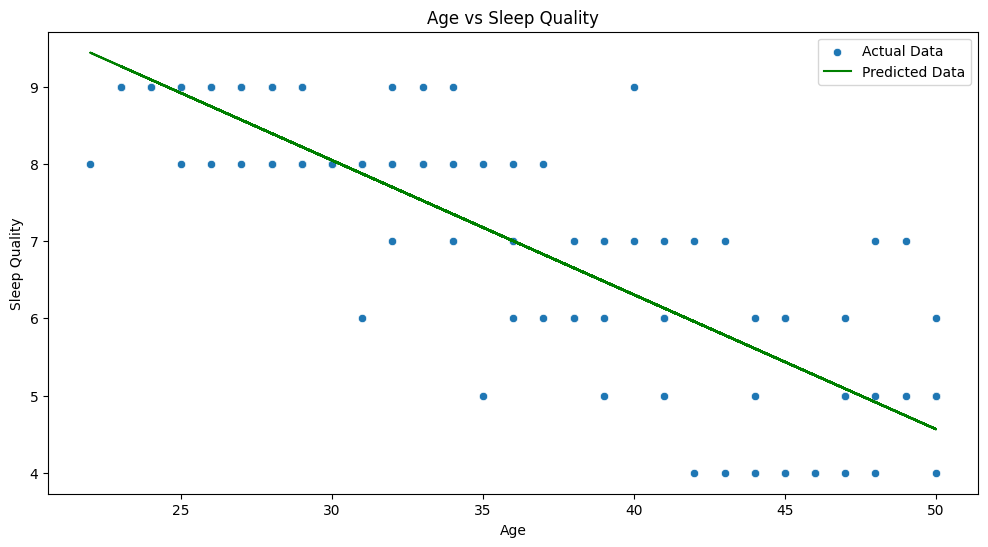

In [14]:
plt.figure(figsize = (12, 6))
sns.scatterplot(x = 'Age', y = 'Sleep Quality', data = df, label = 'Actual Data')

plt.plot(X, model.predict(X), color = 'green', label = 'Predicted Data')

plt.title("Age vs Sleep Quality")
plt.xlabel("Age")
plt.ylabel("Sleep Quality")
plt.legend()
plt.show()

In [15]:
model.coef_

array([-0.17408531])

In [16]:
model.intercept_

13.268812023190648

### **Physical Activity vs Sleep Quality**

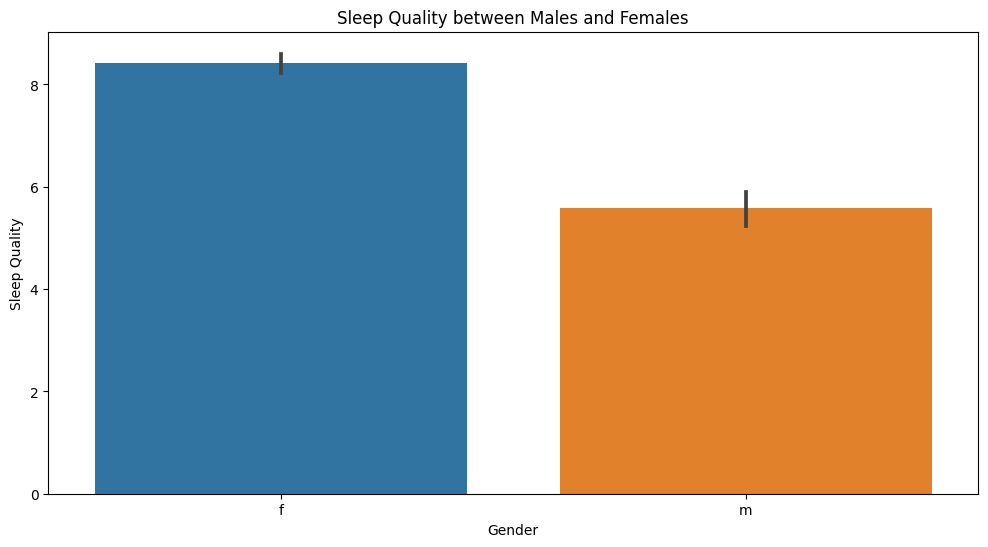

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Gender', y='Sleep Quality', data=df)
plt.title('Sleep Quality between Males and Females')
plt.xlabel('Gender')
plt.ylabel('Sleep Quality')
plt.show()

### **Females have better Sleep Quality overall than Males**

In [18]:
# Define your custom codes
custom_codes = {'low': 1, 'medium': 2, 'high': 3}

# Apply the custom codes using map()
df['Physical Activity Level'] = df['Physical Activity Level'].map(custom_codes)

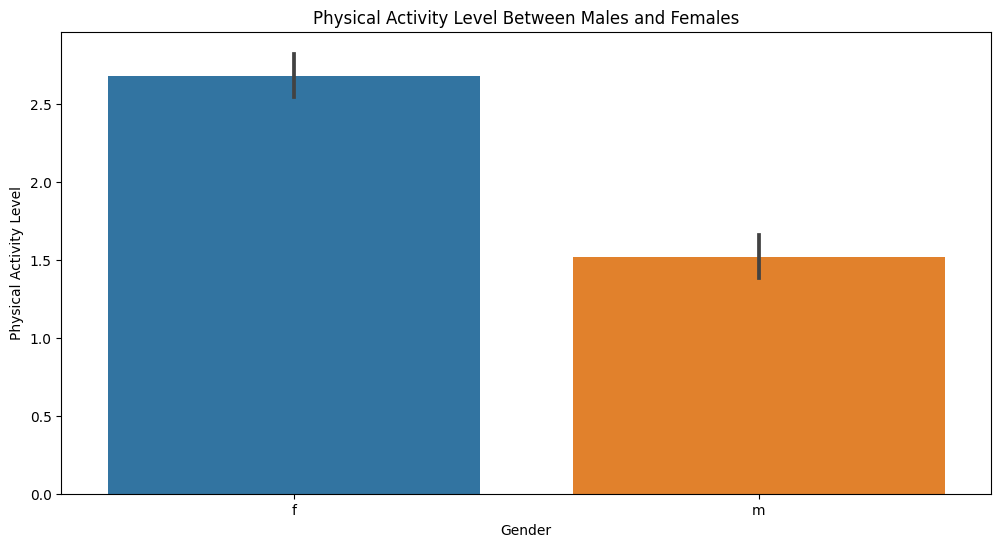

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Gender', y='Physical Activity Level', data=df)
plt.title('Physical Activity Level Between Males and Females')
plt.xlabel('Gender')
plt.ylabel('Physical Activity Level')
plt.show()

### **Females do more physical activity than males**

In [20]:
from scipy import stats

sleep_quality_males = df[df['Gender'] == 'm']['Sleep Quality']
sleep_quality_females = df[df['Gender'] == 'f']['Sleep Quality']

t_sleep_quality, p_sleep_quality = stats.ttest_ind(sleep_quality_males, sleep_quality_females,  nan_policy='omit')


physical_activity_males = df[df['Gender'] == 'm']['Physical Activity Level']
physical_activity_females = df[df['Gender'] == 'f']['Physical Activity Level']

t_physical_activity, p_physical_activity = stats.ttest_ind(physical_activity_males, physical_activity_females, nan_policy='omit')

In [21]:
print(f"t-sleep-quality  + {t_sleep_quality:.2f}")
print(f"p-sleep-quality  + {p_sleep_quality:.2f}")
print(f"t-physical_activity  + {t_physical_activity:.2f}")
print(f"p-physical_activity  + {p_physical_activity:.2f}")

t-sleep-quality  + -14.32
p-sleep-quality  + 0.00
t-physical_activity  + -10.98
p-physical_activity  + 0.00


In simple terms, the T-test and P-value help us compare two groups (like males and females) to see if their average values (like sleep quality or physical activity level) are significantly different from each other.


What is a T-test? A T-test compares the means (average values) of two groups to determine if the difference between them is statistically significant. In your case, you're comparing:

Sleep quality of males vs. females Physical activity level of males vs. females What does the T-statistic mean? The T-statistic measures how different the means of two groups are, relative to the variation in their data. A high absolute value (like -14.32 or -10.98) means there is a large difference between the groups, while a value closer to 0 would mean there's little to no difference.

A negative T-statistic means the first group (males) has a lower mean than the second group (females). A positive T-statistic would mean the opposite (males have a higher mean). What is the P-value? The P-value tells you how likely it is that the difference you observed between the two groups is due to random chance.

If the P-value is very small (like 0.0000), it suggests that the difference between the groups is statistically significant and not just random. In other words, there's a strong likelihood that the groups are truly different. A large P-value (greater than 0.05) would mean the difference is likely due to random variation, so we wouldn't consider the difference meaningful. Why T-test and P-value for Sleep Quality and Physical Activity? You're using the T-test and P-value to answer these questions:

For Sleep Quality: "Is there a significant difference between how males and females rate their sleep quality?" The T-statistic of -14.32 and P-value of 0.0000 show that males and females have a statistically significant difference in their sleep quality, with males having a lower average sleep quality than females. For Physical Activity Level: "Is there a significant difference in the physical activity levels between males and females?" The T-statistic of -10.98 and P-value of 0.0000 again indicate a significant difference, with males having lower physical activity levels compared to females. Summary You found the T-values and P-values to compare the average sleep quality and physical activity levels between males and females. Since both P-values are close to 0, it means the differences you found are statistically significant, meaning males and females are likely to have different sleep quality and physical activity levels in the dataset.

# Timing of Sleep and waking up vs Sleep Quality

In [22]:
def sleep_duration_hours_helper_function(str_time):
    h = int(str_time.split(':')[0])
    m = int(str_time.split(':')[1])
    return h + m/60
    
df['Bedtime'] = df['Bedtime'].apply(sleep_duration_hours_helper_function)
df['Wake-up Time'] = df['Wake-up Time'].apply(sleep_duration_hours_helper_function)

df.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23.00,6.50,8000,2500,2,healthy,no,no
1,2,34,m,7,0.50,7.00,5000,2200,1,unhealthy,yes,yes
2,3,29,f,9,22.75,6.75,9000,2700,3,healthy,no,no
3,4,41,m,5,1.00,6.50,4000,2100,1,unhealthy,yes,no
4,5,22,f,8,23.50,7.00,10000,2800,3,medium,no,no


In [23]:
df['Sleep Duration Hours'] = (df['Wake-up Time'] - df['Bedtime']) % 24
df.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Sleep Duration Hours
0,1,25,f,8,23.00,6.50,8000,2500,2,healthy,no,no,7.5
1,2,34,m,7,0.50,7.00,5000,2200,1,unhealthy,yes,yes,6.5
2,3,29,f,9,22.75,6.75,9000,2700,3,healthy,no,no,8.0
3,4,41,m,5,1.00,6.50,4000,2100,1,unhealthy,yes,no,5.5
4,5,22,f,8,23.50,7.00,10000,2800,3,medium,no,no,7.5


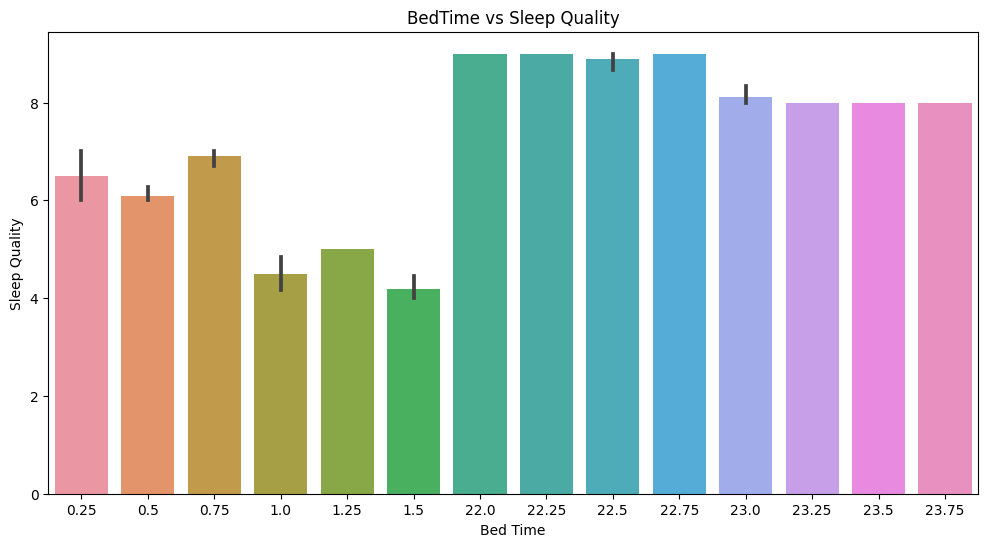

In [24]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Bedtime', y = 'Sleep Quality', data = df)
plt.xlabel("Bed Time")
plt.ylabel("Sleep Quality")
plt.title("BedTime vs Sleep Quality")
plt.show()

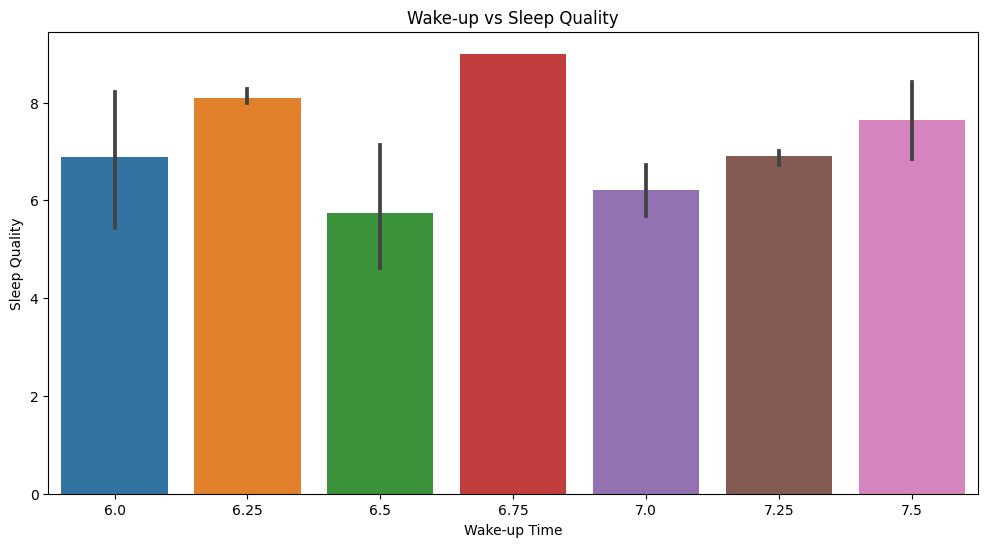

In [25]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Wake-up Time', y = 'Sleep Quality', data = df)
plt.xlabel("Wake-up Time")
plt.ylabel("Sleep Quality")
plt.title("Wake-up vs Sleep Quality")
plt.show()

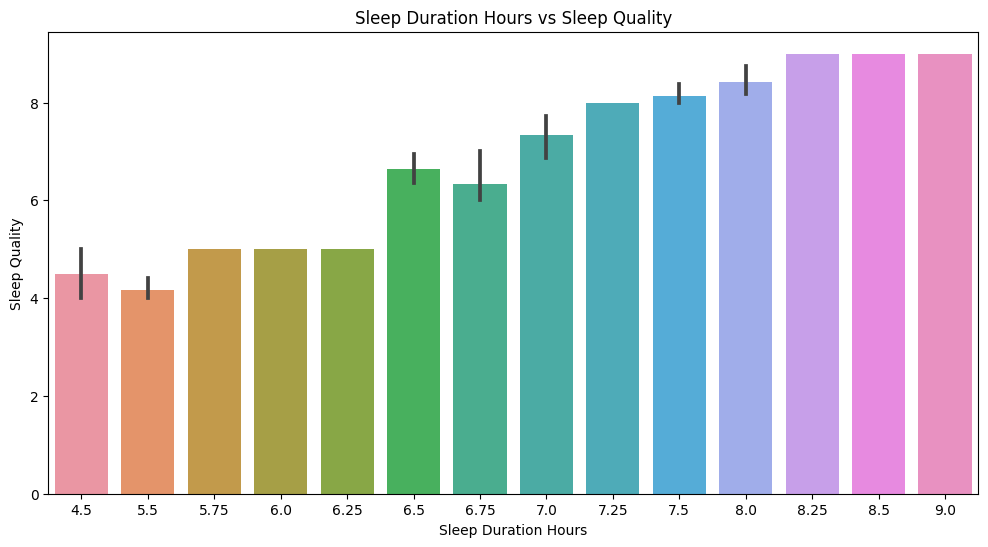

In [26]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Sleep Duration Hours', y = 'Sleep Quality', data = df)
plt.xlabel("Sleep Duration Hours")
plt.ylabel("Sleep Quality")
plt.title("Sleep Duration Hours vs Sleep Quality")
plt.show()

### **Checking Linear Relationship between Sleep Time Hours & Sleep Quality**

In [27]:
X = df[['Sleep Duration Hours']]
Y = df['Sleep Quality']

model = LinearRegression()

model.fit(X, Y)

LinearRegression()

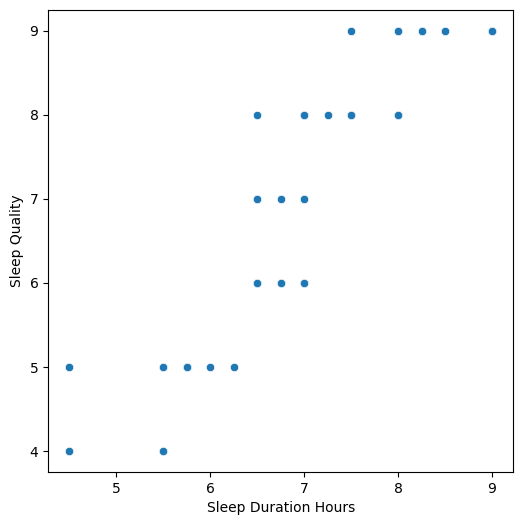

In [28]:
plt.figure(figsize = (6,6))
sns.scatterplot(x = 'Sleep Duration Hours', y = 'Sleep Quality', data = df)
plt.show()


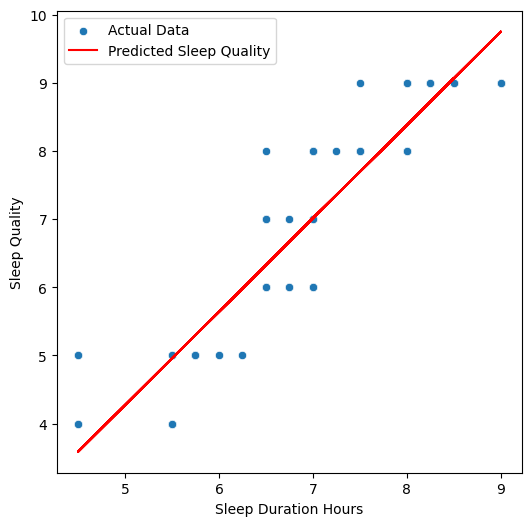

In [29]:
plt.figure(figsize = (6,6))
sns.scatterplot(x = 'Sleep Duration Hours', y = 'Sleep Quality', data = df, label = 'Actual Data')
plt.plot(X, model.predict(X), color = 'red', label = 'Predicted Sleep Quality')
plt.legend()
plt.show()

In [30]:
from sklearn.metrics import r2_score
r2_score(Y, model.predict(X))

0.8443929044393098

# Physical Activity vs Sleep Quality

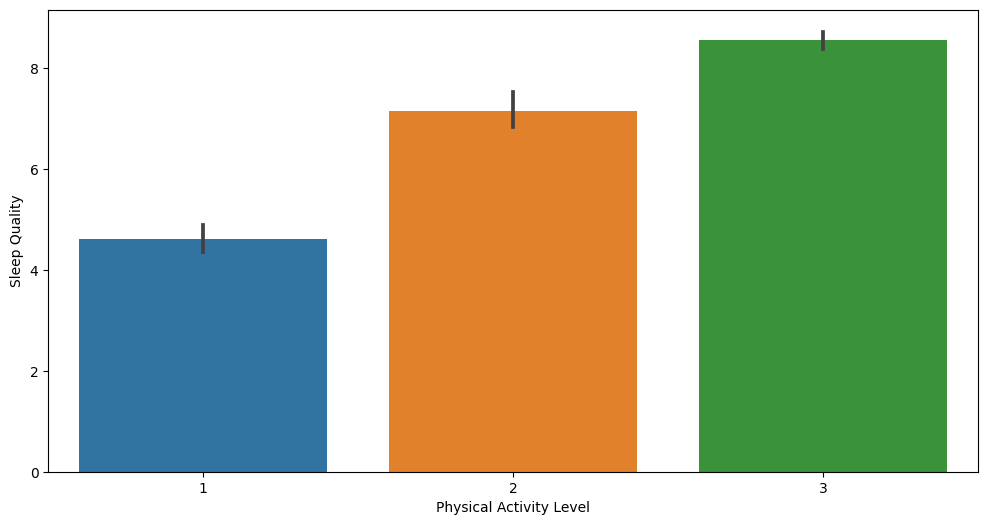

In [31]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Physical Activity Level', y = 'Sleep Quality', data = df)
plt.show()

# Amount of calories burnt vs Sleep Quality

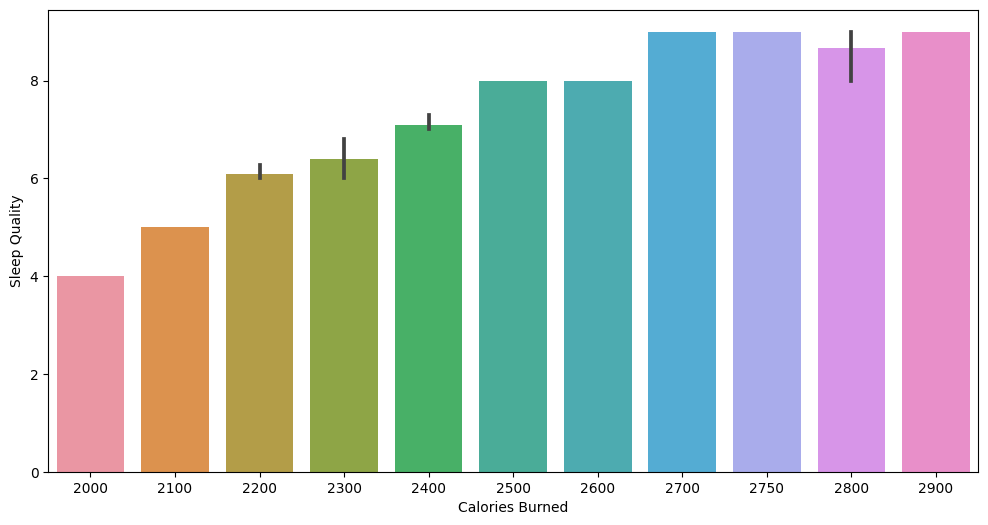

In [32]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Calories Burned', y = 'Sleep Quality', data = df)
plt.show()

In [33]:
model = LinearRegression()

X = df[['Calories Burned']]
Y = df['Sleep Quality']

model.fit(X, Y)

LinearRegression()

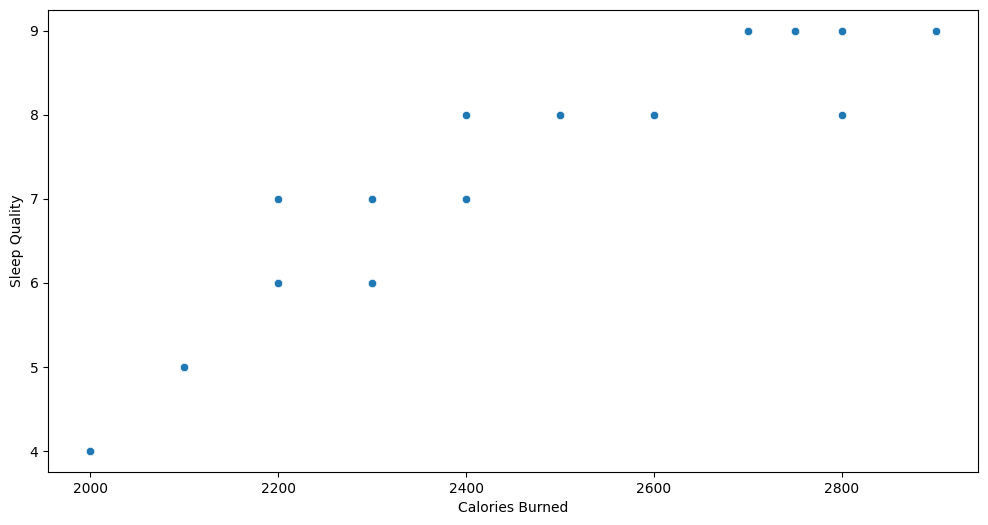

In [34]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'Calories Burned', y = 'Sleep Quality', data = df)
plt.show()

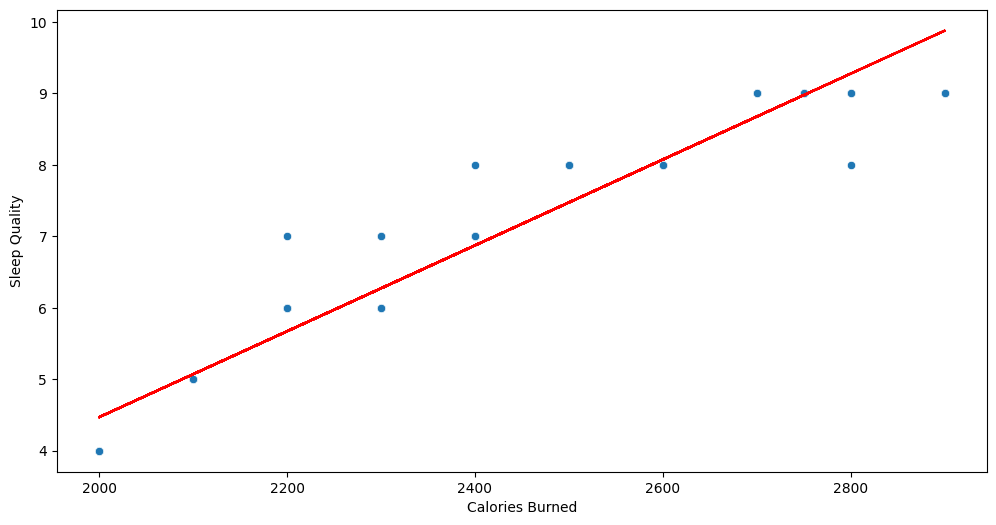

In [35]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'Calories Burned', y = 'Sleep Quality', data = df)
plt.plot(X, model.predict(X), color = 'red')
plt.show()

In [36]:
r2_score(Y, model.predict(X))

0.9478131260919266

# Impact of Dietary Habits on Sleep Quality

In [37]:
df['Dietary Habits'].value_counts()

Dietary Habits
unhealthy    41
medium       30
healthy      29
Name: count, dtype: int64

In [38]:
# Define your custom codes
custom_codes = {'unhealthy': 1, 'medium': 2, 'healthy': 3}

# Apply the custom codes using map()
df['Dietary Habits'] = df['Dietary Habits'].map(custom_codes)
df.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Sleep Duration Hours
0,1,25,f,8,23.00,6.50,8000,2500,2,3,no,no,7.5
1,2,34,m,7,0.50,7.00,5000,2200,1,1,yes,yes,6.5
2,3,29,f,9,22.75,6.75,9000,2700,3,3,no,no,8.0
3,4,41,m,5,1.00,6.50,4000,2100,1,1,yes,no,5.5
4,5,22,f,8,23.50,7.00,10000,2800,3,2,no,no,7.5


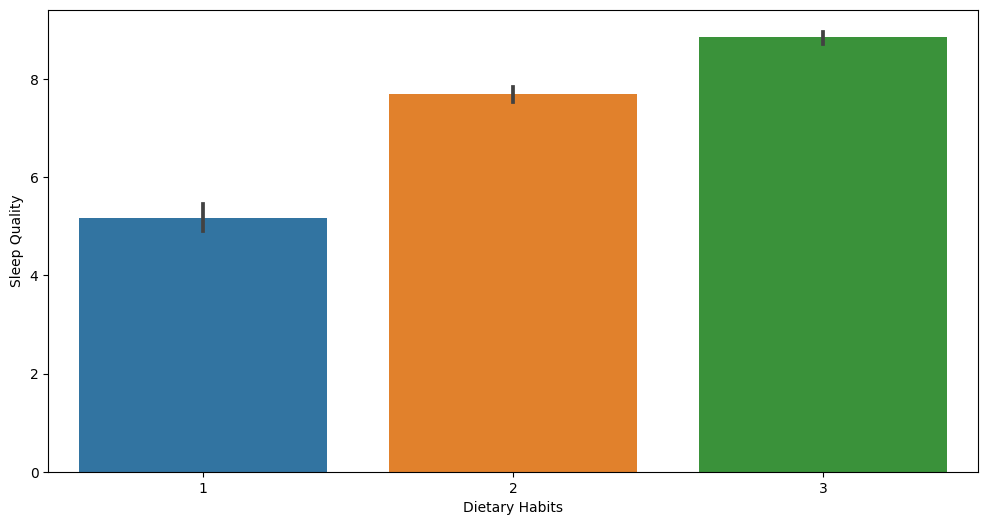

In [39]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Dietary Habits', y = 'Sleep Quality', data = df)
plt.show()

# Sleep Disorder vs Sleep Quality

In [40]:
df['Sleep Disorders'].head()

0     no
1    yes
2     no
3    yes
4     no
Name: Sleep Disorders, dtype: object

In [41]:
sleep_disorder_sleep_quality_summary = df.groupby('Sleep Disorders').agg({
    'Sleep Quality': ['mean', 'std'],
    'Physical Activity Level': lambda x: x.value_counts().to_dict()
})
print(sleep_disorder_sleep_quality_summary)

                Sleep Quality           Physical Activity Level
                         mean       std                <lambda>
Sleep Disorders                                                
no                   7.837838  1.085736          {2: 38, 3: 36}
yes                  4.615385  0.697247                 {1: 26}


### **Sleep Disorder affect on Physical Activity**

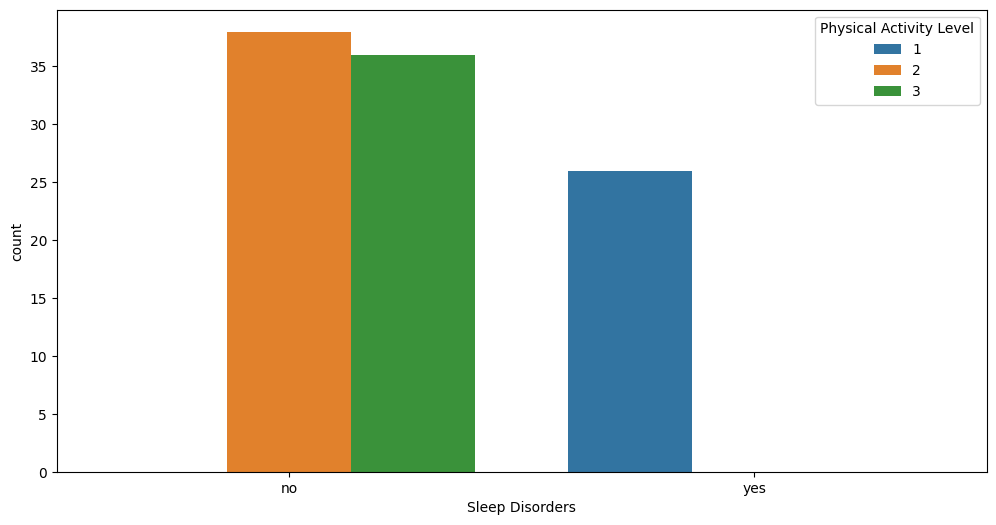

In [42]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Sleep Disorders', hue = 'Physical Activity Level', data = df)
plt.show()

### **Sleep Disorder vs Sleep Quality**

Text(0, 0.5, 'Sleep Quality')

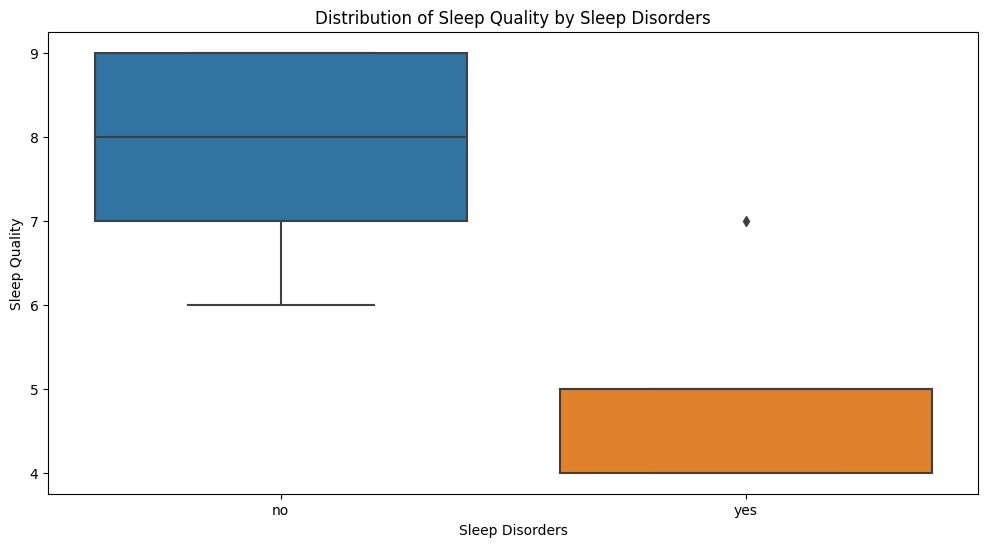

In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sleep Disorders', y='Sleep Quality', data=df)
plt.title('Distribution of Sleep Quality by Sleep Disorders')
plt.xlabel('Sleep Disorders')
plt.ylabel('Sleep Quality')

In [44]:
yes_sleep_disorder_quality = df[df['Sleep Disorders'] == 'yes']['Sleep Quality']
no_sleep_disorder_quality =  df[df['Sleep Disorders'] == 'no']['Sleep Quality']

t_sleep_disorder_quality, p_sleep_disorder_quality = stats.ttest_ind(yes_sleep_disorder_quality, no_sleep_disorder_quality, nan_policy='omit')

In [45]:
print(f"t-sleep-disorder-quality : {t_sleep_disorder_quality:.2f}")
print(f"p-sleep-disorder-quality : {p_sleep_disorder_quality:.2f}")

t-sleep-disorder-quality : -14.12
p-sleep-disorder-quality : 0.00


# Medication vs Sleep Quality

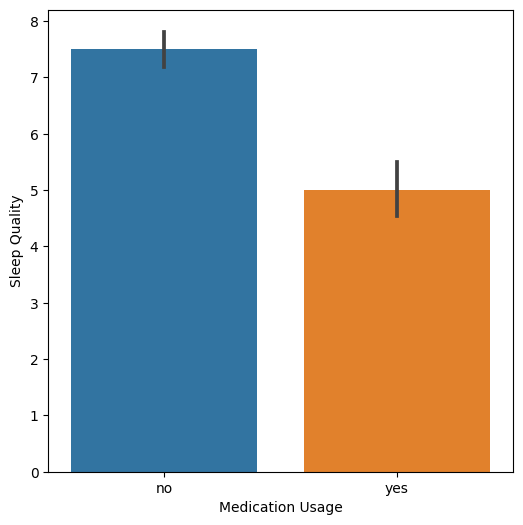

In [46]:
plt.figure(figsize = (6, 6))
sns.barplot(x = 'Medication Usage', y = 'Sleep Quality', data = df)
plt.show()

In [47]:
medication_quality = df[df['Medication Usage'] == 'yes']['Sleep Quality']
no_medication_quality = df[df['Medication Usage'] == 'no']['Sleep Quality']

t_statistic, p_value = stats.ttest_ind(medication_quality, no_medication_quality, equal_var=False)
print(f't-test Statistic for Sleep Quality: {t_statistic:.2f}')
print(f'p-value: {p_value:.4f}')

t-test Statistic for Sleep Quality: -8.08
p-value: 0.0000


# Summary

In [48]:
df_numerics = df.select_dtypes(include = ['number'])
corr = df_numerics.corr()

print(corr['Sleep Quality'].sort_values(ascending=False))

Sleep Quality              1.000000
Daily Steps                0.976277
Calories Burned            0.973557
Sleep Duration Hours       0.918909
Dietary Habits             0.902498
Physical Activity Level    0.875203
Bedtime                    0.853312
User ID                   -0.014248
Wake-up Time              -0.048526
Age                       -0.848356
Name: Sleep Quality, dtype: float64


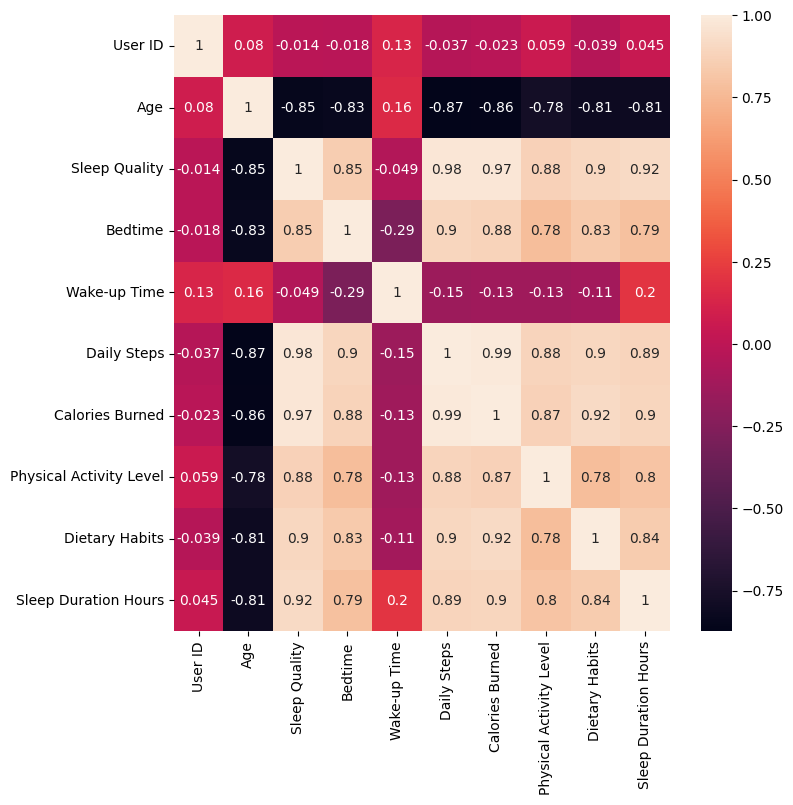

In [49]:
plt.figure(figsize = (8,8))
sns.heatmap(corr, annot = True)
plt.show()